# Customer Segmentation and Content Based Recomendation

Hacktiv8 Batch hck-001

- Ferry Marcellus Suhendra
- Hedy Fernando
- Naomi Amelia 
- Raihan Rafif

### Introduction
 
    introduction disini

#### Problem

    problem statement disini

### Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_distances,pairwise_distances,cosine_similarity
import cv2
from tqdm.auto import tqdm
import os
from matplotlib import pyplot as plt

## RFM Customer Segmentation

### Data Loading

    info dataset (sumber dataset, info table, deskripsi kolom ) disini

In [10]:
# Loading all .csv data
df_articles = pd.read_csv('articles.csv')
df_customers = pd.read_csv('customers.csv')
df_transaction = pd.read_csv('transactions_train.csv')
pd.set_option('display.max_columns', None)

In [11]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [12]:
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [13]:
df_transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [14]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [15]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [16]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [17]:
df_transaction['t_dat'] = pd.to_datetime(df_transaction['t_dat'])

In [18]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


#### Check Missing Values

In [19]:
df_articles.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [20]:
df_customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [21]:
df_transaction.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

#### Check duplicated

In [22]:
len(df_articles.duplicated())

105542

In [23]:
len(df_customers.duplicated())

1371980

### RFM data creation

#### Calculating Recency

In [24]:
df_recency = df_transaction.groupby(by='customer_id', as_index=False)['t_dat'].max()
df_recency.columns = ['customer_id', 'lastpurchasedate']
recent_date = df_recency['lastpurchasedate'].max()
df_recency['recency'] = df_recency['lastpurchasedate'].apply(
    lambda x: (recent_date - x).days)

df_recency.head()

,customer_id,lastpurchasedate,recency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,2020-09-05,17
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2020-07-08,76
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2020-09-15,7
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2019-06-09,471
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2020-08-12,41


#### Calculating Frequency

In [25]:
df_frequency = df_transaction.groupby(by='customer_id', as_index=False)['t_dat'].count()
df_frequency.columns = ['customer_id', 'frequency']
df_frequency.head()

,customer_id,frequency
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13


#### Calculating Monetary

In [26]:
df_monetary = df_transaction.groupby('customer_id', as_index=False)['price'].count()
df_monetary.columns = ['customer_id', 'monetary']
df_monetary.head()

,customer_id,monetary
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,13


#### Merging RFM

In [27]:
df_rf = df_recency.merge(df_frequency, on='customer_id')
df_rfm = df_rf.merge(df_monetary, on='customer_id').drop(columns='lastpurchasedate')

In [28]:
df_rfm

,customer_id,recency,frequency,monetary
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,21,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,86,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,18,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,2,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,13,13
...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,16,51,51
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,35,84,84
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,13,45,45
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,92,7,7


### Exploratory Data Analysis

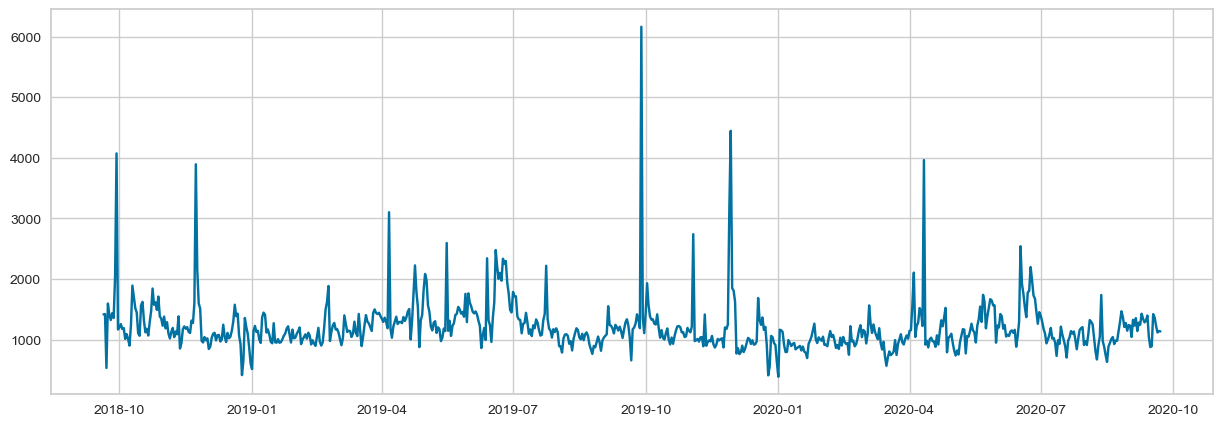

In [29]:
# Price action
plt.figure(figsize=(15,5))
price_line = df_transaction.groupby('t_dat')['price'].sum()
plt.plot(price_line)

In [30]:
# Join transaction with articles tables
high_prod = df_transaction.join(df_articles.set_index('article_id'), on='article_id')

# create group by for product name
prod_high = high_prod.groupby(by='prod_name', as_index=False)['article_id'].count()
prod_high.columns = ['prod_name', 'count']

# Sort values from high selling
prod_sort = prod_high.sort_values(by='count', ascending=False)
prod_sort.reset_index(drop=True, inplace=True)
prod_sort

,prod_name,count
0,Jade HW Skinny Denim TRS,168052
1,Luna skinny RW,143216
2,Timeless Midrise Brief,122143
3,Tilly (1),105670
4,Cat Tee.,81304
...,...,...
45503,Stina overall,1
45504,Relaxed tap basic 79,1
45505,Carrie USB cable,1
45506,Carrie V9 ski jkt,1


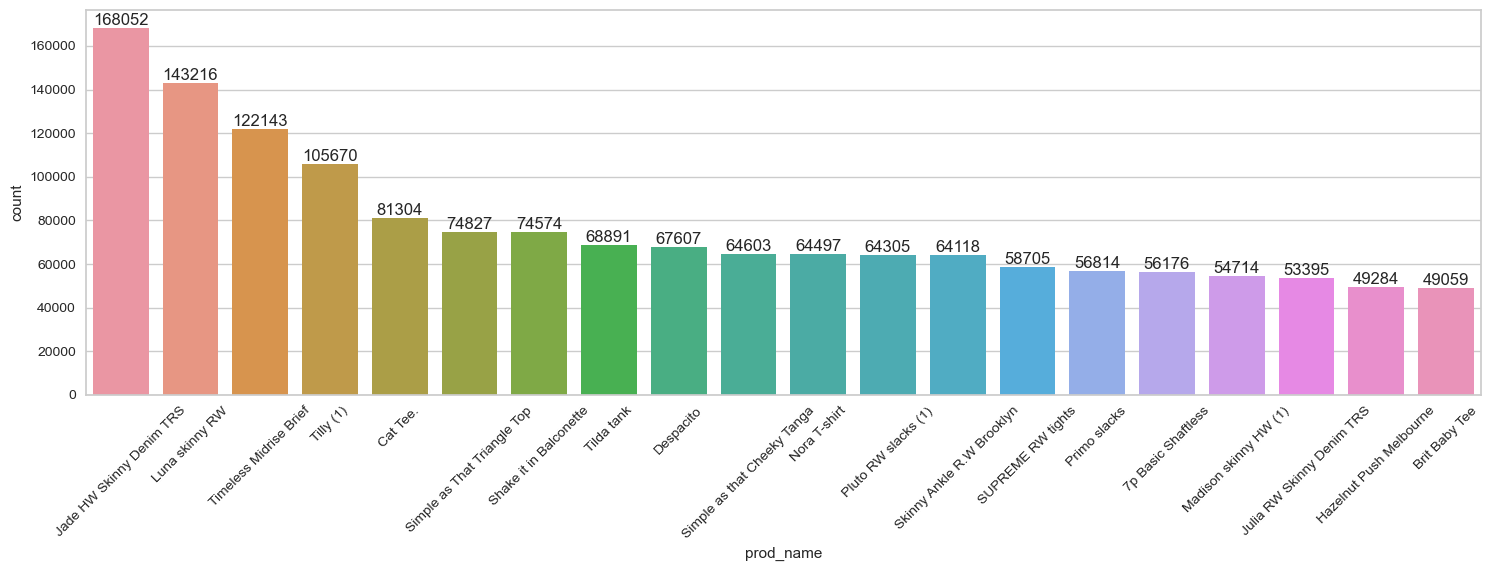

In [31]:
# Product high selling

plt.figure(figsize=(18,5))
plt.xticks(rotation = 45)
ax = sns.barplot(data=prod_sort[:20], x="prod_name", y="count")
for i in ax.containers:
    ax.bar_label(i,)

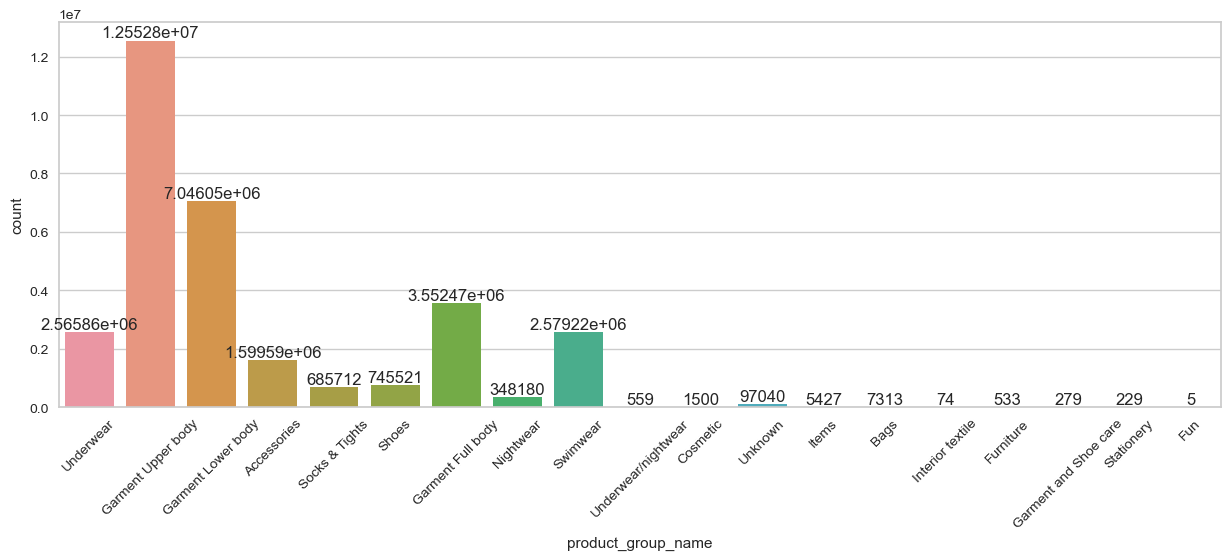

In [32]:
# product group name

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
ax = sns.countplot(x=high_prod['product_group_name'])
for i in ax.containers:
    ax.bar_label(i,)

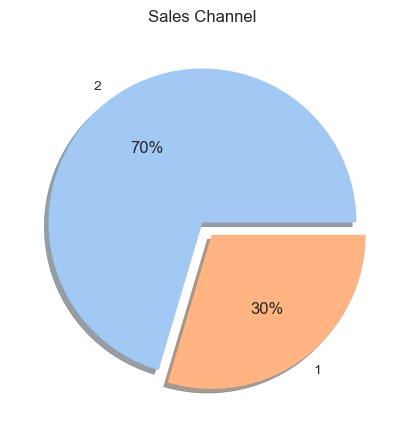

In [33]:
# Create pie chart sales channel

plt.figure(figsize=(5,5))
plt.title('Sales Channel')

label = df_transaction['sales_channel_id'].unique()
colors = sns.color_palette('pastel')
explode = (0, 0.1)

plt.pie(df_transaction['sales_channel_id'].value_counts(),colors=colors,labels=label, explode=explode, 
        autopct='%.0f%%', shadow=True)
plt.show()

### Data Preprocessing

In [34]:
# defining plot function
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

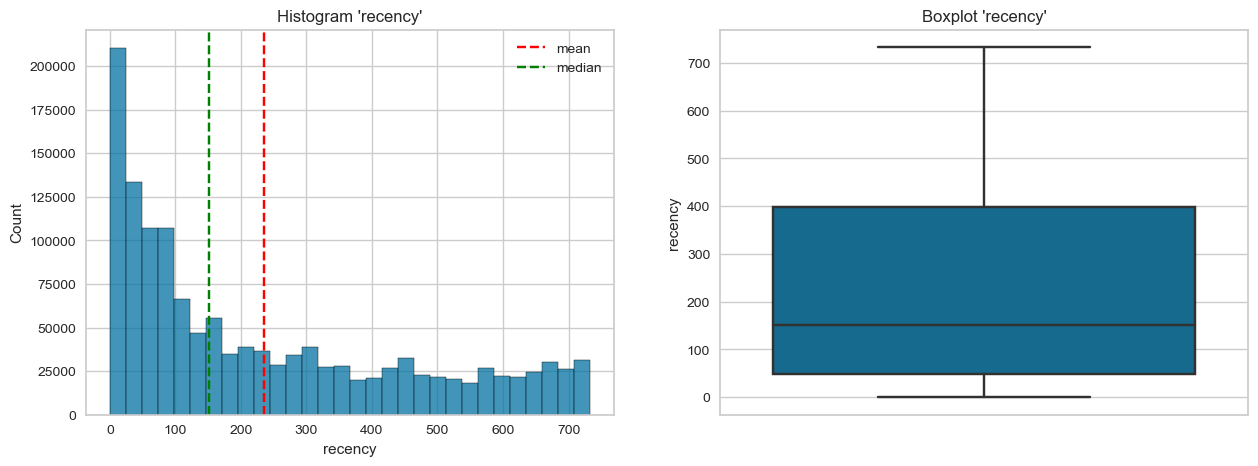

recency Kurtosis: -0.6757738004166298
recency Skewness: 0.8015839691970799
Columns 'recency' right skewed


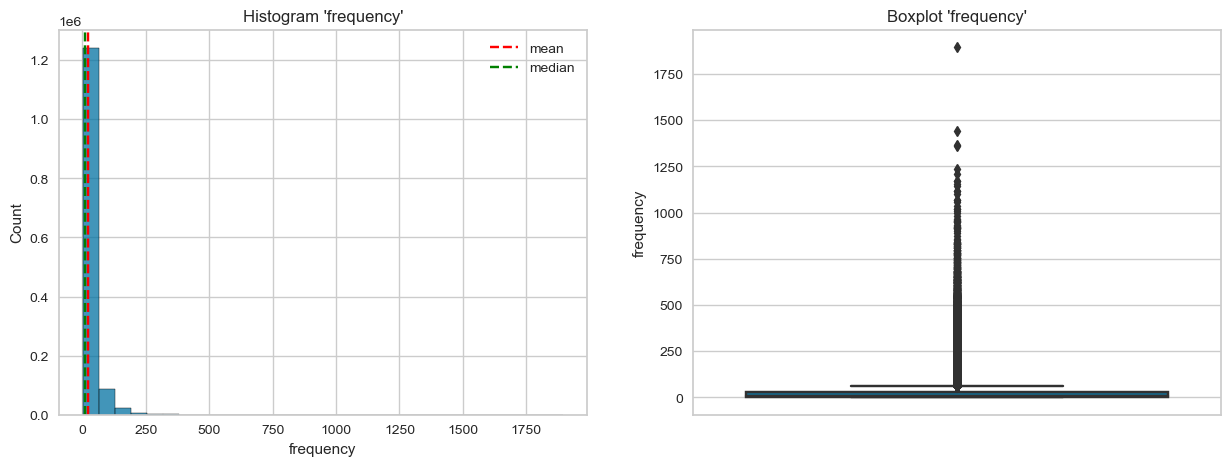

frequency Kurtosis: 56.24939720976781
frequency Skewness: 5.243189357560082
Columns 'frequency' right skewed


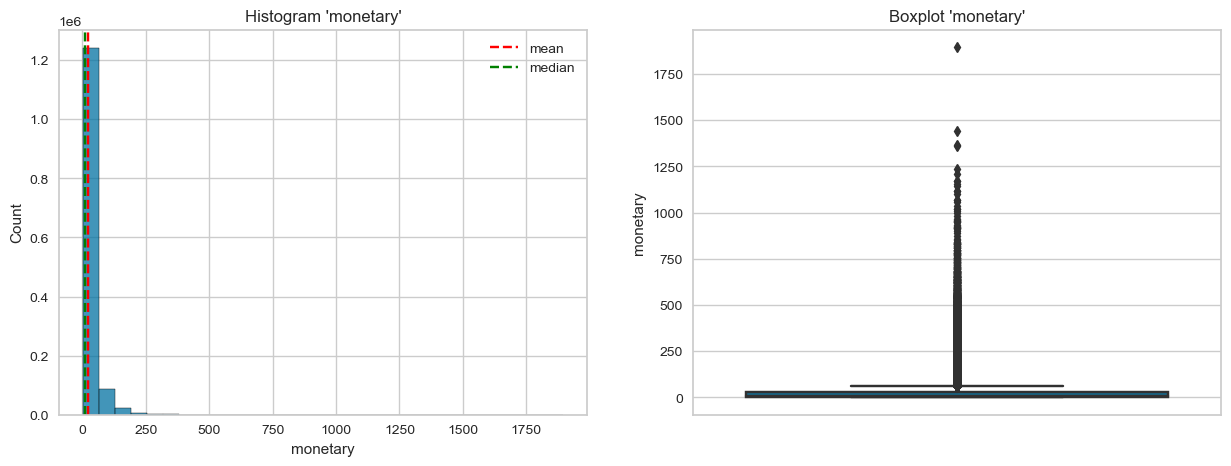

monetary Kurtosis: 56.24939720976781
monetary Skewness: 5.243189357560082
Columns 'monetary' right skewed


In [35]:
# checking for data skewness and outlier
for col in ['recency','frequency','monetary']:
    plot_dist(df_rfm,col)

In [36]:
# Defining features
df_rfm_x= df_rfm[['recency','frequency','monetary']]
# scaling the data
scaler=RobustScaler()
x=scaler.fit_transform(df_rfm_x)
x=pd.DataFrame(x, columns=df_rfm_x.columns)
x

,recency,frequency,monetary
0,-0.382857,0.500000,0.500000
1,-0.214286,3.208333,3.208333
2,-0.411429,0.375000,0.375000
3,0.914286,-0.291667,-0.291667
4,-0.314286,0.166667,0.166667
...,...,...,...
1362276,-0.385714,1.750000,1.750000
1362277,-0.331429,3.125000,3.125000
1362278,-0.394286,1.500000,1.500000
1362279,-0.168571,-0.083333,-0.083333


### Model Definition & Training

    explain model here

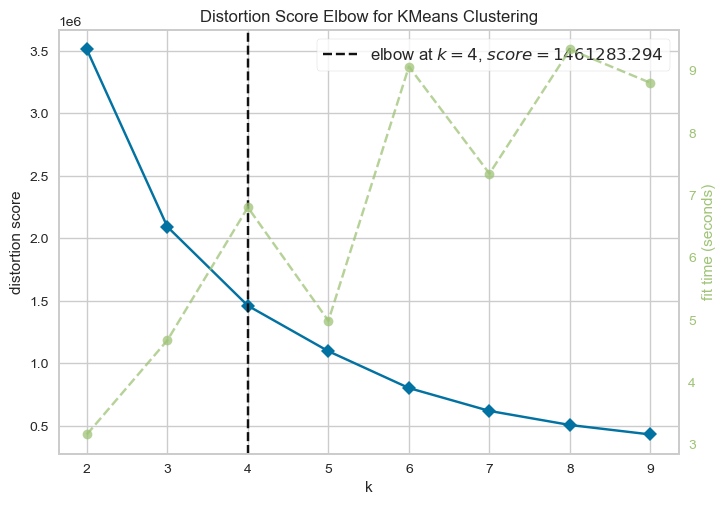

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
# defining models
km_model = KMeans(algorithm='full',random_state=32)
# Showing elbow point
Elbow_M = KElbowVisualizer(km_model, k=9)
Elbow_M.fit(x)
Elbow_M.show()

It is found that the elbow value of the model is at 4. this will be set as the number of clusters for the model.

In [38]:
# redefining model
km_model = KMeans(algorithm='full',n_clusters=4,random_state=32)

In [39]:
# Training the model
km_model.fit_predict(x)

array([0, 1, 0, ..., 3, 0, 0])

In [40]:
# reducing data to 2 dimensions for visualization
pca=PCA(n_components=2)
xp=pca.fit_transform(x)
xp

array([[-0.07193546, -0.63421617],
       [ 3.71986545, -0.0678231 ],
       [-0.24477719, -0.68103563],
       ...,
       [ 1.33578353, -0.49835645],
       [-0.91471897, -0.50697676],
       [-1.32613709,  0.02738194]])

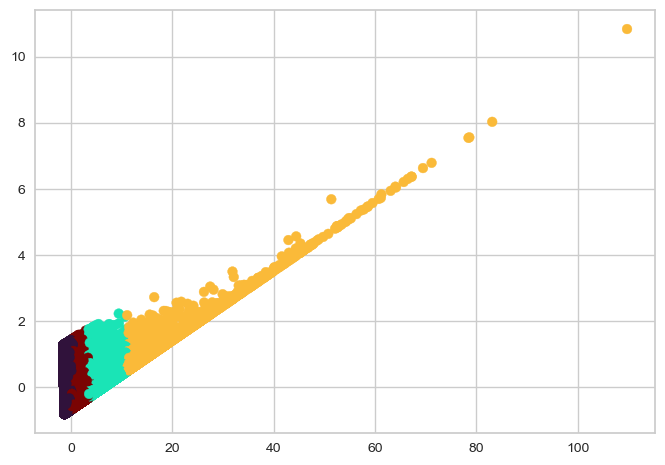

In [41]:
# plotting model labels
plt.scatter(xp[:,0],xp[:,1],c=km_model.labels_,cmap='turbo')
plt.show()

In [42]:
# defining prediction data
y_pred=km_model.labels_
y_pred_df=pd.DataFrame(y_pred)
y_pred_df=y_pred_df.reset_index(drop=True)

dfa=pd.concat([df_rfm,y_pred_df],axis=1)
dfa.rename({0:'category'},axis=1,inplace=True)
dfa

,customer_id,recency,frequency,monetary,category
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,21,21,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,86,86,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,18,18,0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,2,2,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,13,13,0
...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,16,51,51,3
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,35,84,84,1
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,13,45,45,3
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,92,7,7,0


### Post-model Data Analysis

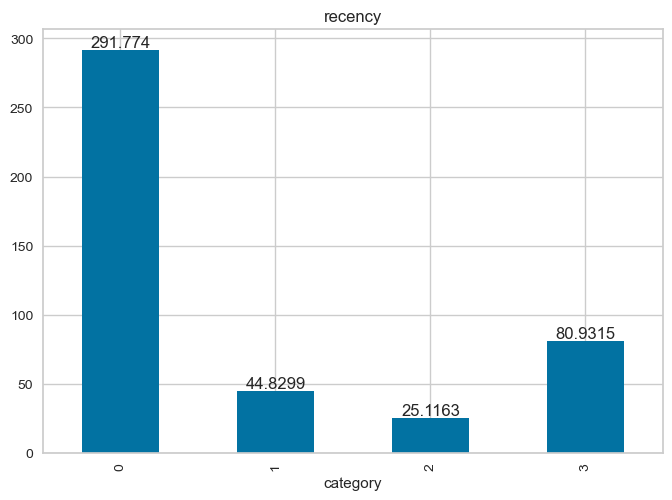

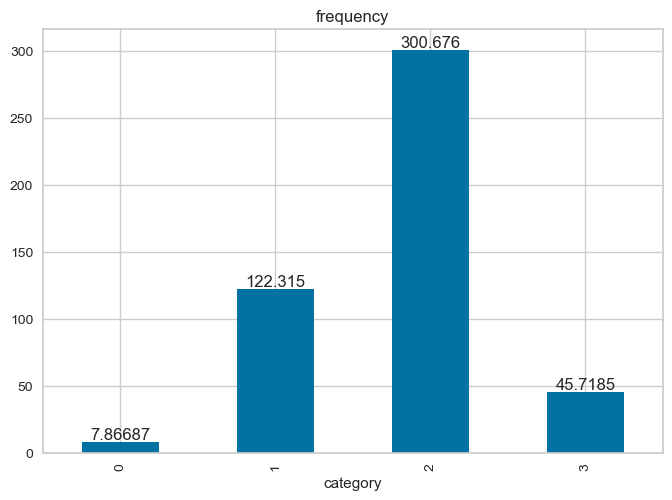

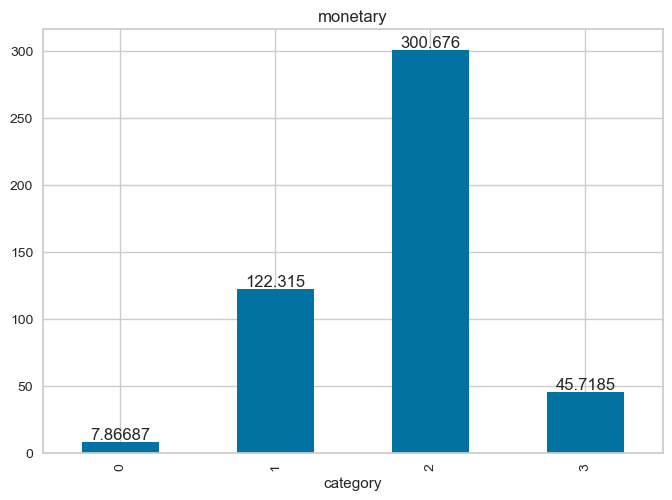

In [43]:
for col in ['recency','frequency','monetary']:
    
    ax = dfa.groupby('category')[col].mean().plot(kind='bar')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(col)
    plt.show()

In [44]:
# Change the category name for customers segmentation
dfa['category'] = np.where(dfa['category'] ==
                                      2, "Loyal Customers",
                                      (np.where(
                                        dfa['category'] == 1,
                                        "Middle Customers",
                                        (np.where(dfa['category'] == 3,
                            'Low Customers', 'Near Lost')))))
dfa

,customer_id,recency,frequency,monetary,category
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,21,21,Near Lost
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,86,86,Middle Customers
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,18,18,Near Lost
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,2,2,Near Lost
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,13,13,Near Lost
...,...,...,...,...,...
1362276,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,16,51,51,Low Customers
1362277,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,35,84,84,Middle Customers
1362278,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,13,45,45,Low Customers
1362279,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,92,7,7,Near Lost


## Product Category Segmentation

### Exploratory Data Analysis

In [45]:
df_transaction

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [46]:
df_articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,4,Dark,5,Black,7188,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1919,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,4,Dark,5,Black,1641,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,4,Dark,5,Black,3946,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [47]:
df_category = pd.merge(df_transaction,
                       df_articles,
                       how='left',
                       left_on=df_transaction['article_id'],
                       right_on=df_articles['article_id']
)

In [48]:
df_category['article_id_y'].value_counts()

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id_y, Length: 104547, dtype: int64

In [49]:
df_category_gr1=df_category.groupby('article_id_y',as_index=False)['article_id_x'].count()
df_category_gr1.columns = ['product_id', 'sales_count']
df_category_gr1

,product_id,sales_count
0,108775015,10841
1,108775044,7250
2,108775051,215
3,110065001,1044
4,110065002,539
...,...,...
104542,952267001,41
104543,952938001,9
104544,953450001,17
104545,953763001,35


In [50]:
df_category_gr2=df_category.groupby('article_id_y',as_index=False)['price'].mean()
df_category_gr2.columns = ['product_id', 'price']
df_category_gr2

,product_id,price
0,108775015,0.008142
1,108775044,0.008114
2,108775051,0.004980
3,110065001,0.020219
4,110065002,0.018205
...,...,...
104542,952267001,0.014982
104543,952938001,0.048006
104544,953450001,0.016836
104545,953763001,0.021908


In [51]:
df_category_grf = df_category_gr1.merge(df_category_gr2, on='product_id')


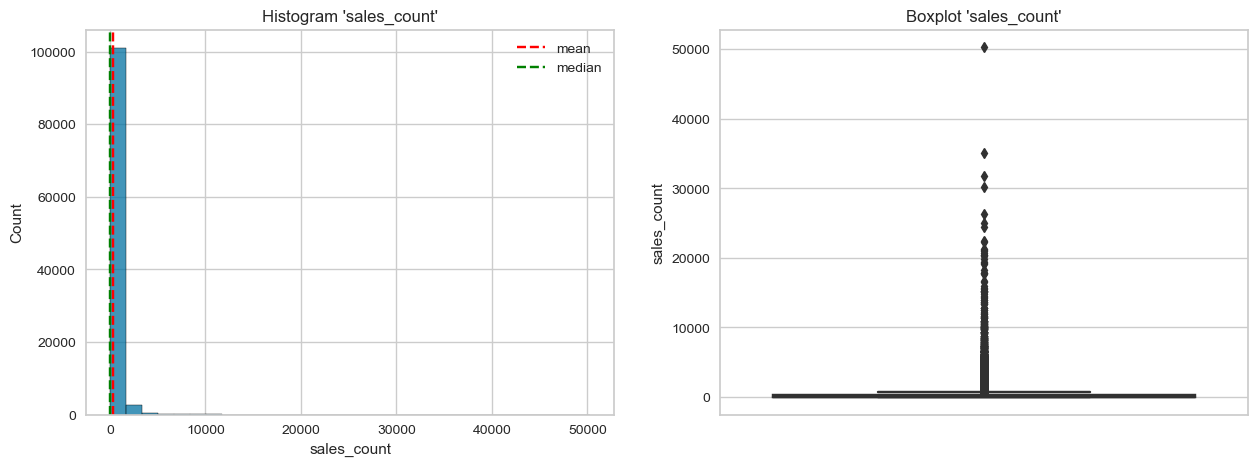

sales_count Kurtosis: 377.2763593243197
sales_count Skewness: 12.830078689007399
Columns 'sales_count' right skewed


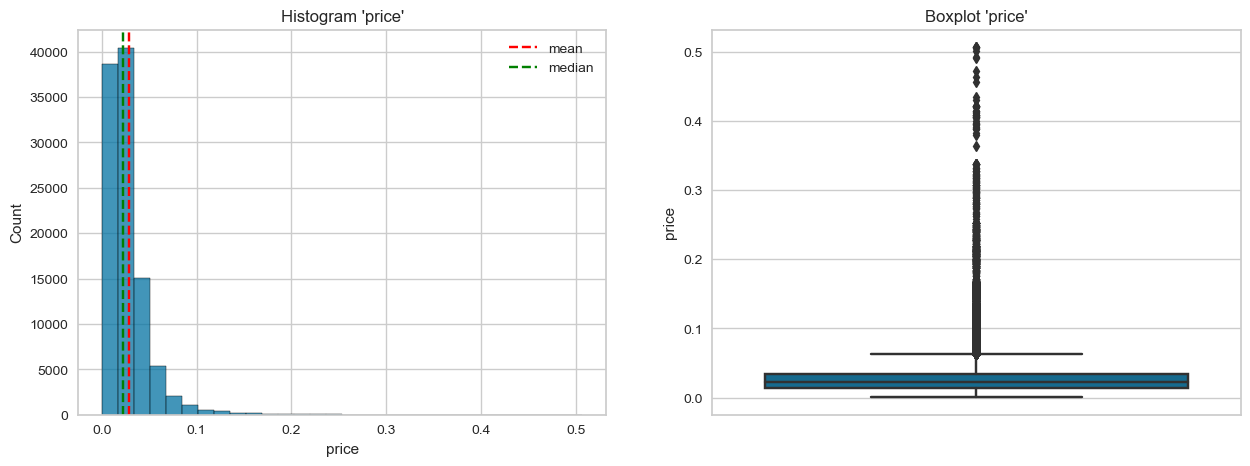

price Kurtosis: 44.593896130200704
price Skewness: 4.812431177668909
Columns 'price' right skewed


In [52]:
for col in ['sales_count','price']:
    plot_dist(df_category_grf,col)

In [53]:
product_cluster= df_category_grf[['sales_count','price']]

prod=scaler.fit_transform(product_cluster)
prod=pd.DataFrame(prod, columns=product_cluster.columns)
prod

,sales_count,price
0,39.617647,-0.761242
1,26.415441,-0.762667
2,0.551471,-0.924406
3,3.599265,-0.137989
4,1.742647,-0.241902
...,...,...
104542,-0.088235,-0.408256
104543,-0.205882,1.295917
104544,-0.176471,-0.312547
104545,-0.110294,-0.050835


The cluster ammount of the this modeling will follow the same amount of clusters on the previous modeling in order to create product clusters that can be paired to the customer clusters.

In [54]:
cluster_model = KMeans(algorithm='full',n_clusters=4,random_state=32)

In [55]:
cluster_model.fit_predict(prod)

array([3, 2, 0, ..., 0, 0, 0])

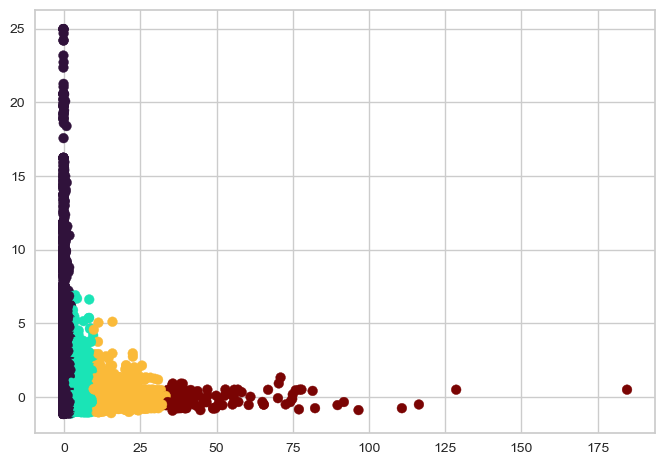

In [56]:
plt.scatter(x=prod['sales_count'],y=prod['price'],c=cluster_model.labels_,cmap='turbo')
plt.show()

In [57]:
cat_pred=cluster_model.labels_
cat_pred_df=pd.DataFrame(cat_pred)
cat_pred_df=cat_pred_df.reset_index(drop=True)

prod_cat=pd.concat([df_category_grf,cat_pred_df],axis=1)
prod_cat.rename({0:'class'},axis=1,inplace=True)
prod_cat

,product_id,sales_count,price,class
0,108775015,10841,0.008142,3
1,108775044,7250,0.008114,2
2,108775051,215,0.004980,0
3,110065001,1044,0.020219,1
4,110065002,539,0.018205,0
...,...,...,...,...
104542,952267001,41,0.014982,0
104543,952938001,9,0.048006,0
104544,953450001,17,0.016836,0
104545,953763001,35,0.021908,0


### Post-Modeling Data Analysis

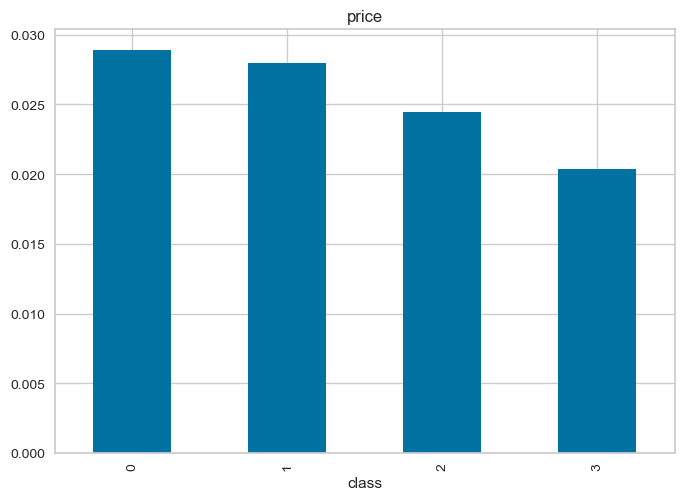

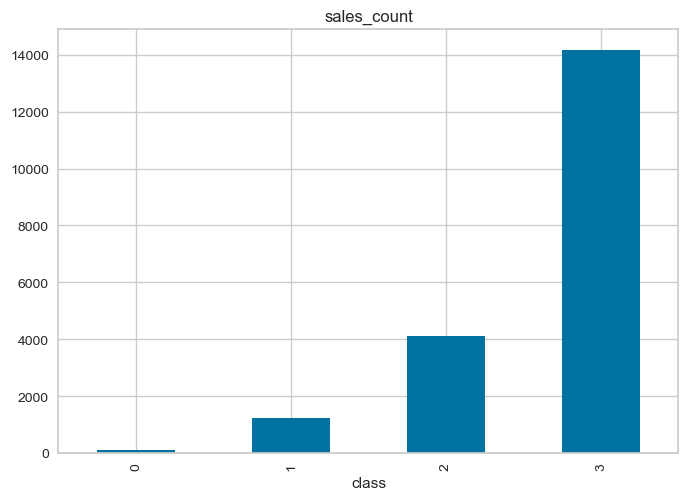

In [58]:
for col in ['price','sales_count']:
    prod_cat.groupby('class')[col].mean().plot(kind='bar')
    plt.title(col)
    plt.show()

In [59]:
# Change the category name for product segmentation
prod_cat['class'] = np.where(prod_cat['class'] ==
                                      1, "High end",
                                      (np.where(
                                        prod_cat['class'] == 2,
                                        "Middle end",
                                        (np.where(prod_cat['class'] == 3,
                            'Common', 'Luxury')))))
prod_cat

,product_id,sales_count,price,class
0,108775015,10841,0.008142,Common
1,108775044,7250,0.008114,Middle end
2,108775051,215,0.004980,Luxury
3,110065001,1044,0.020219,High end
4,110065002,539,0.018205,Luxury
...,...,...,...,...
104542,952267001,41,0.014982,Luxury
104543,952938001,9,0.048006,Luxury
104544,953450001,17,0.016836,Luxury
104545,953763001,35,0.021908,Luxury


## Image based Recomendation System

In [123]:
# defining function for embedding image
%matplotlib inline
def return_image_embedding(model,img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    curr_df = pd.DataFrame(preds[0]).T
    return curr_df
model = ResNet50(include_top=False, weights='imagenet', pooling='avg')
img_path = 'Images_s/0108775044.jpg'
return_image_embedding(model,img_path)

1/1 [==============================] - 4s 4s/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [131]:
images_path = os.listdir('images_s/')
embedding_dfs = pd.DataFrame()
for curr_img in tqdm(images_path):
        curr_df = return_image_embedding(model,'images_s/'+curr_img)
        curr_df['image'] = curr_img
        embedding_dfs = pd.concat([embedding_dfs,curr_df],ignore_index=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


In [132]:
embedding_dfs

0         1         2         3         4         5         6  \
0    0.300054  1.800267  0.000000  0.161263  0.184694  0.030781  0.228568   
1    0.000000  2.163665  0.031610  1.354169  0.042176  0.000000  0.333276   
2    0.645087  0.691452  0.050122  0.361583  0.551168  0.006212  0.137911   
3    0.028639  2.028209  0.086303  0.232832  0.000000  0.022181  0.000000   
4    0.038957  1.295068  0.000000  0.018434  0.000000  0.002442  0.064828   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.000000  0.206069  0.186887  0.000000  0.899192  0.078062  0.071407   
996  0.522088  2.633847  0.000000  1.154726  0.429812  0.204310  0.044746   
997  1.170117  3.621575  0.146752  0.183450  0.310938  0.139485  0.025319   
998  0.111112  3.390320  0.217860  0.024329  0.136030  0.165948  0.079356   
999  0.521383  3.353117  0.317869  0.002198  0.391884  0.052309  0.018115   

            7         8         9        10        11        12        13  \
0    0.067783  0.000000  0.000000  0.186216  0.217007  0.006454  0.062866   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.085249   
2    0.000000  0.000000  0.166020  0.065775  0.555074  0.000000  0.295905   
3    0.047839  0.227043  0.000000  0.651110  0.574661  0.569659  0.035200   
4    0.000000  0.369163  0.000000  0.006300  0.043325  0.187737  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.225004  0.000000  0.000000  1.672770  0.818624  1.605150  0.126832   
996  0.645346  0.043347  0.060122  0.202197  0.828934  0.000896  0.047113   
997  1.604183  0.000000  0.000000  0.009580  0.000000  0.116503  0.358487   
998  0.361516  0.000000  0.491748  0.208945  0.000000  0.299281  0.084449   
999  0.496114  0.000000  0.294112  0.062820  0.000000  0.223190  0.293578   

           14        15        16        17        18        19        20  \
0    2.057923  0.150909  0.000000  0.222913  0.023923  0.026903  0.144391   
1    0.024378  0.047051  0.000000  0.329597  0.000000  0.000000  0.105192   
2    0.277524  0.036576  0.000000  0.128818  0.132228  0.694759  0.118414   
3    0.150512  0.298165  0.000000  0.020848  0.090806  3.329796  0.022457   
4    0.468902  0.376332  0.000000  0.770720  0.000000  2.003762  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.090197  0.000000  0.059813  0.222744  0.000000  0.035593  0.169643   
996  1.594091  0.007018  0.000000  0.056746  0.024469  0.015012  0.000000   
997  0.000000  0.000000  0.000000  0.000000  1.087869  0.227157  1.394097   
998  0.035558  0.000000  0.000000  0.000000  0.409324  0.000000  1.326231   
999  0.126701  0.009936  0.000000  0.000000  0.650344  0.000000  1.584077   

           21        22        23        24        25        26        27  \
0    1.377332  0.073280  0.055055  1.004101  0.041970  0.006182  0.000000   
1    2.016409  0.226460  0.259503  0.768116  0.864378  0.093343  0.000000   
2    1.466860  0.293477  0.347313  0.388757  0.023793  2.495064  0.000000   
3    0.922958  0.041123  0.145381  0.262163  0.000000  0.005460  0.000906   
4    0.509969  0.029368  0.401858  1.750259  0.000000  0.591149  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
995  0.447090  0.428571  0.175366  0.001516  0.568852  0.002171  0.307006   
996  0.962433  0.281295  0.030598  0.210630  0.869921  0.081065  1.111207   
997  0.738018  0.386913  0.348365  0.047681  0.000105  0.017651  0.040756   
998  0.649340  0.469730  0.702172  0.009126  0.044193  0.003080  0.012294   
999  0.045113  0.003800  0.266383  0.029160  0.000000  0.022920  0.017315   

           28        29        30        31        32        33        34  \
0    0.000000  0.000000  0.064375  0.415936  0.181996  0.364150  2.550390   
1    0.000000  0.104640  0.000000  0.223977  0.014309  0.226894  2.836752   
2    0.157741  0.371091  0.017786  0.116676  0.153698  0.424168  2.021241   
3   

In [182]:
embedding_dfs.to_csv('embedding_dfs.csv')

In [183]:
cosine_similarity_df = pd.DataFrame(cosine_similarity(embedding_dfs.drop('image',axis=1)))

In [184]:
def show_img(image_name,title=image_name):
    img_path = 'images_s/'+str(image_name)
    im = cv2.imread(img_path)
    #im = cv2.resize(im, (960, 540))
    plt.axis('off')
    plt.imshow(im[:,:,::-1])
    plt.title(title)
    plt.show()

In [185]:
curr_index = embedding_dfs[embedding_dfs['image']=='0108775015.jpg'].index[0]

In [186]:
pd.DataFrame(cosine_similarity_df.iloc[curr_index])

,0
0,1.000000
1,0.660911
2,0.690214
3,0.561779
4,0.496119
...,...
995,0.438257
996,0.566751
997,0.461398
998,0.494591


## Model Inference

-----------------------------------------------------------------------
Original Product:


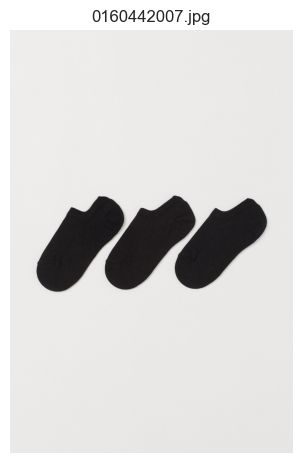

-----------------------------------------------------------------------
Recommended Product


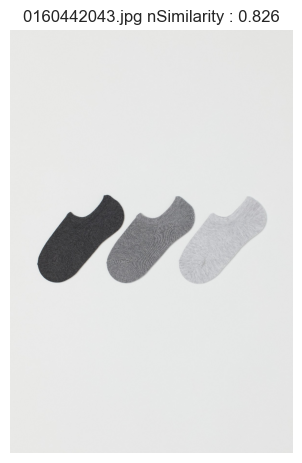

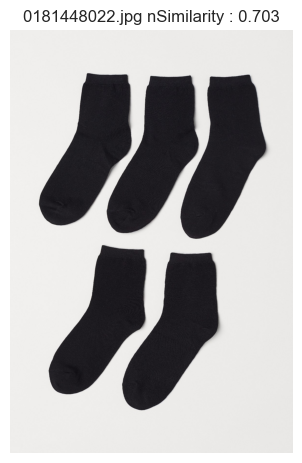

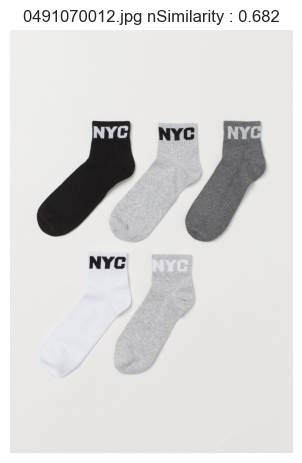

In [187]:
def fetch_most_similar_products(image_name,n_similar=3):
    print("-----------------------------------------------------------------------")
    print("Original Product:")
    show_img(image_name,image_name)
    curr_index = embedding_dfs[embedding_dfs['image']==image_name].index[0]
    closest_image = pd.DataFrame(cosine_similarity_df.iloc[curr_index].nlargest(n_similar+1)[1:])
    print("-----------------------------------------------------------------------")
    print("Recommended Product")
    for index,imgs in closest_image.iterrows():
        similar_image_name = embedding_dfs.iloc[index]['image']
        similarity = np.round(imgs.iloc[0],3)
        show_img(similar_image_name,str(similar_image_name)+' nSimilarity : '+str(similarity))
image_name = '0160442007.jpg'
fetch_most_similar_products(image_name)